# Skin Cancer MNIST: HAM10000 - Exploratory Data Analysis

Author: Endrit Mustafa

# Assignment Part 1

From PDF File: 

The dataset is a modified version of Skin Cancer MNIST: HAM10000, a collection of images containing pigmented skin lesions classified into different categories. It is split into training, testing and validation subsets, containing 8515, 1000 and 500 samples respectively.

In <code>metadata.csv</code>, you will find a table mapping the identifier of each image to its lesion type, as
well as other metadata about the lesion or the patient as an individual. The lesion types are
classified into integers as follows:

* 0: BKL (benign keratosis-like lesions)
* 1: NV (melanocytic nevi)
* 2: DF (dermatofibroma)
* 3: MEL (melanoma)
* 4: VASC (vascular lesions)
* 5: BCC (basal cell carcinoma)
* 6: AKIEC (actinic keratoses and intraepithelial carcinoma)

Note: The metadata does not contain the lesion type for samples in the test subset. For these
samples, the value of lesion_type is set to -1.

**TASK**

Use exploratory data analysis to discover as many characteristics of the dataset as needed. This includes information about the distribution of each feature, their range of values and
correlations between them. 

Submission: For this part, submit a directory named exploratory_data_analysis/, with the Jupyter notebook (.ipynb) containing the code and visualizations inside. <br>
Evaluation criteria: Evaluation will be based on what characteristics were uncovered and how well they’re related to the dataset/challenge, as well as how they’re visualized.

## Importing Libraries 

Firstly for the Exploratory Data Analysis Part below are imported the nescecary libraries that will be used on this notebook!

In [6]:
import pandas as pd
import numpy as np
import zipfile
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataframe

Since we have a zip file, firstly lets check the files/folders we have on this Zip File

In [7]:
# Specifying to the zip file
zip_file = '../data/dataset.zip'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    
    for file_info in zip_ref.filelist:
        
        # Getting the filename of each file in the Zip folder
        file_name = file_info.filename

        # Checking if there is a CSV file and printing its path
        if file_name.lower().endswith('.csv'):
            print("CSV File:", file_name)
            
        # Printing the path of other files
        elif file_name.endswith('/'):
            print("Folder:", file_name)

Folder: dataset/
CSV File: dataset/metadata.csv
Folder: dataset/images/
Folder: dataset/images/test/
Folder: dataset/images/train/
Folder: dataset/images/validation/


So in this Zip file we have a main folder named <code>dataset</code>. <br>
This folder contains: <code>metadata.csv</code> and <code>images</code> folder! <br>
<code>images</code> folder contains folders: test, train, and validation. 

In this part we are focused on <code>metadata.csv</code> file, and below we will read it

In [8]:
# Defining the path of the CSV file within the zip archive (The path that was extracted in the cell above)
csv_file_path = 'dataset/metadata.csv'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    with zip_ref.open(csv_file_path) as csv_file:
        # Reading the CSV data into a pandas DataFrame
        df = pd.read_csv(csv_file)

**NOTE:**

In [20]:
# Use this cell to extract the dataframe if ../data/dataset.zip is not in the directory
# df pd.read_csv('../data/metadata.csv')

---

In [9]:
# Showing the dataframe
df

,image_id,lesion_type,confirmation,age,sex,localization
0,IMAGE_0000244,0,histo,80.0,male,scalp
1,IMAGE_0001916,0,histo,80.0,male,scalp
2,IMAGE_0006461,0,histo,80.0,male,scalp
3,IMAGE_0003197,0,histo,80.0,male,scalp
4,IMAGE_0009907,0,histo,75.0,male,ear
...,...,...,...,...,...,...
10010,IMAGE_0007158,6,histo,40.0,male,abdomen
10011,IMAGE_0005939,6,histo,40.0,male,abdomen
10012,IMAGE_0001721,6,histo,40.0,male,abdomen
10013,IMAGE_0008064,6,histo,80.0,male,face


In [10]:
print('The dataframe contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataframe contains 10015 rows and 6 columns


Based on the dataset, we have this columns and their meaning:

* **image_id** - The ID of each image that is related with the image folder in zipfile (each image can be mapped with image_id)
* **lesion_type** - Integer value of lesion type
* **confirmation** - Type of the confirmation
* **age** - Age of the patient
* **sex** - Sex of the patient
* **localization** - Localization area in the body of the patient

## Data Wragling & Exploratory Data Analysis (EDA)

Before doing the Exploratory Data Analysis (EDA) it is very important to understand the dataset that we have and also it is very important to clean the unwanted values!

In [11]:
# Checking the general informations of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image_id      10015 non-null  object 
 1   lesion_type   10015 non-null  int64  
 2   confirmation  10015 non-null  object 
 3   age           9958 non-null   float64
 4   sex           10015 non-null  object 
 5   localization  10015 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 469.6+ KB


From the cell above, we understand that we have to deal with object, int64 and float64 dtypes columns. As well by analysing the above output, we understand that we have null values in the dataset.<br>
We will deal firstly with null values, before continuing to the other aspects of the data!

### Dealing with null values

In [12]:
# Checking the amount of null values for each column

df.isnull().sum()

image_id         0
lesion_type      0
confirmation     0
age             57
sex              0
localization     0
dtype: int64

In [13]:
# Checking the percentage of null values for each column

nulls_percentage = ((df.isnull().sum() / df.count()) * 100)

# Converting nulls_percentage Series to a DataFrame for better visualized resutls
null_df = nulls_percentage.to_frame().rename(columns={0:'% of null vales'})
null_df

,% of null vales
image_id,0.000000
lesion_type,0.000000
confirmation,0.000000
age,0.572404
sex,0.000000
localization,0.000000


As we can se above, we have only 0.572% (57 null values) nulls in 'age' column.<br>
Since there is a small number of null values in this df, the best practice is to drop these null values.

In [14]:
# Droping null values

df.dropna(axis=0, inplace=True)

In [15]:
# Checking the amount of null values for each column after making the drop

df.isnull().sum()

image_id        0
lesion_type     0
confirmation    0
age             0
sex             0
localization    0
dtype: int64

Null values from our df are dropped and now we can continue to analyse the df in other aspects!

### Dealing & Tracking irregular values

As it is shown above, from df.info(), we have numerical columns (int64 and float46 types) and string columns (object type)<br>
Lets analyze them seperately

In [16]:
# Analysing dtype='object' columns

df.describe(include='object')

,image_id,confirmation,sex,localization
count,9958,9958,9958,9958
unique,9958,4,3,15
top,IMAGE_0001514,histo,male,back
freq,1,5332,5400,2192


**'confirmation'** Column

In [17]:
# Unique values of 'confirmation' column and number of patients based on 'confirmation' value:

df['confirmation'].value_counts()

histo        5332
follow_up    3704
consensus     853
confocal       69
Name: confirmation, dtype: int64

**'sex'** Column

In [18]:
# Unique values of 'sex' column and number of patients based on 'sex' value:

df['sex'].value_counts()

male       5400
female     4548
unknown      10
Name: sex, dtype: int64

As it is seen above, we have some 'unknown' values for the sex of the samples!

Tracking unknown sex patients!

In [19]:
df.loc[df['sex'] == 'unknown']

,image_id,lesion_type,confirmation,age,sex,localization
7315,IMAGE_0008213,1,histo,60.0,unknown,foot
7316,IMAGE_0001161,1,histo,60.0,unknown,foot
7317,IMAGE_0007210,1,histo,60.0,unknown,foot
7413,IMAGE_0002764,1,histo,35.0,unknown,trunk
7414,IMAGE_0006340,1,histo,35.0,unknown,trunk
7415,IMAGE_0006564,-1,histo,35.0,unknown,trunk
8016,IMAGE_0007671,1,histo,0.0,unknown,back
8017,IMAGE_0009036,1,histo,0.0,unknown,back
8023,IMAGE_0001280,1,histo,45.0,unknown,abdomen
8024,IMAGE_0007094,1,histo,45.0,unknown,abdomen


Since there are only 10 rows, we will filter them out in order to have cleaner data!

In [20]:
# Filtering out 'unknown' values from sex column!

df = df[df['sex'] != 'unknown']

In [21]:
df['sex'].value_counts()

male      5400
female    4548
Name: sex, dtype: int64

**'localization'** Column

In [22]:
df['localization'].value_counts()

back               2190
lower extremity    2077
trunk              1400
upper extremity    1116
abdomen            1019
face                743
chest               405
foot                314
unknown             187
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

Again, we have some 'unknown' values now for the localization column of the samples!

In [18]:
# df = df[df['localization'] != 'unknown']

In [23]:
df.describe(include='object')

,image_id,confirmation,sex,localization
count,9948,9948,9948,9948
unique,9948,4,2,15
top,IMAGE_0001514,histo,male,back
freq,1,5322,5400,2190


In [24]:
# Analysing dtype as numerical columns

df.describe()

,lesion_type,age
count,9948.000000,9948.000000
mean,1.289606,51.878267
std,1.561469,16.957802
min,-1.000000,0.000000
25%,1.000000,40.000000
50%,1.000000,50.000000
75%,1.000000,65.000000
max,6.000000,85.000000


We should be careful with 'age' value 0. They could be infants of they value is not correct. In this notebook I will consider them as infants, due to the lack of informations we have in related with this dataset!

In [25]:
# Copying the cleaned df and storing it to df_cleaned

df_cleaned = df.copy()
df_cleaned

,image_id,lesion_type,confirmation,age,sex,localization
0,IMAGE_0000244,0,histo,80.0,male,scalp
1,IMAGE_0001916,0,histo,80.0,male,scalp
2,IMAGE_0006461,0,histo,80.0,male,scalp
3,IMAGE_0003197,0,histo,80.0,male,scalp
4,IMAGE_0009907,0,histo,75.0,male,ear
...,...,...,...,...,...,...
10010,IMAGE_0007158,6,histo,40.0,male,abdomen
10011,IMAGE_0005939,6,histo,40.0,male,abdomen
10012,IMAGE_0001721,6,histo,40.0,male,abdomen
10013,IMAGE_0008064,6,histo,80.0,male,face


### Exploratory Data Analysis (EDA)

In [26]:
# Lets exclude lesion_type value -1, which are the samples in the test subset, and in which lesion_type value is not really known!

df_cleaned = df_cleaned[df_cleaned['lesion_type'] != -1].copy()

In [27]:
# Creating a dictionary to map numeric values to their corresponding abbreviations

lesion_type_map = {
    0: 'BKL',
    1: 'NV',
    2: 'DF',
    3: 'MEL',
    4: 'VASC',
    5: 'BCC',
    6: 'AKIEC'
}

# Creating a new column with the abbreviations
df_cleaned['lesion_type_abbr'] = df_cleaned['lesion_type'].map(lesion_type_map)

In [28]:
df_cleaned

,image_id,lesion_type,confirmation,age,sex,localization,lesion_type_abbr
0,IMAGE_0000244,0,histo,80.0,male,scalp,BKL
1,IMAGE_0001916,0,histo,80.0,male,scalp,BKL
2,IMAGE_0006461,0,histo,80.0,male,scalp,BKL
3,IMAGE_0003197,0,histo,80.0,male,scalp,BKL
4,IMAGE_0009907,0,histo,75.0,male,ear,BKL
...,...,...,...,...,...,...,...
10009,IMAGE_0006958,6,histo,75.0,female,lower extremity,AKIEC
10010,IMAGE_0007158,6,histo,40.0,male,abdomen,AKIEC
10011,IMAGE_0005939,6,histo,40.0,male,abdomen,AKIEC
10012,IMAGE_0001721,6,histo,40.0,male,abdomen,AKIEC


In [29]:
# Setting 'darkgrid' style for better visualizations

sns.set_style('darkgrid')

Firstly lets plot the number of patients by lesion type!

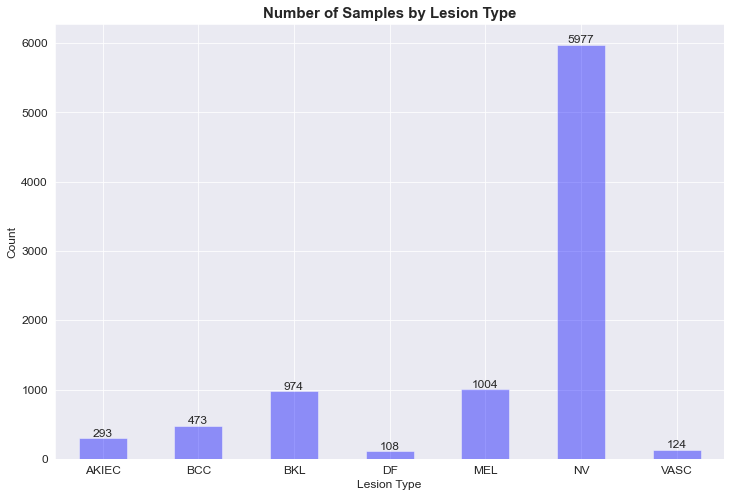

In [30]:
# Calculating the number of samples per each lesion type
values_by_lesion_type = df_cleaned['lesion_type_abbr'].value_counts().sort_index()

# Plotting the bar chart using matplotlib
ax = values_by_lesion_type.plot(kind='bar', alpha=0.4, color='blue', figsize=(12, 8))

# Adding labels to each bar with their counts
for point in ax.patches:
    ax.annotate(str(point.get_height()), (point.get_x() + point.get_width() / 2, point.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.title('Number of Samples by Lesion Type', fontsize=15, fontweight='bold')

plt.xticks(rotation=0, fontsize=12)
plt.xlabel('Lesion Type', fontsize=12)

plt.yticks(fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

The most samples that we have in this dataset are classified as NV, which means with <code>(melanocytic nevi)</code>

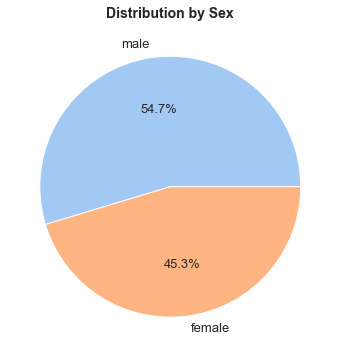

In [31]:
# Calculating the number of samples per each sex type
values_by_sex = df_cleaned['sex'].value_counts()

# Defining custom colors for the pie chart
custom_colors = sns.color_palette("pastel")

# Increasing the overall fontsize of the plot
plt.rc('font', size=13)

# Creating a pie chart with customizations
values_by_sex.plot(kind='pie',labels=values_by_sex.index, colors=custom_colors, autopct='%1.1f%%', figsize=(6, 6))

# Adding the title
plt.title('Distribution by Sex', fontsize=14, fontweight='bold')
plt.ylabel('')

# Displaying the pie chart
plt.show()

Patients in the dataset 54.7 % are Males and 45.3 % are Female. By thins, we can understand that we have big enought samples for both Males and Females

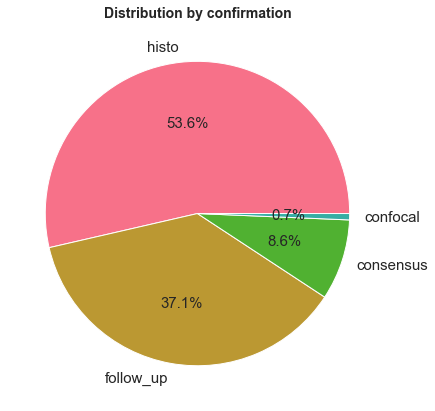

In [32]:
# Calculating the number of samples per each confirmation type
values_by_confirmation = df_cleaned['confirmation'].value_counts()

# Defining custom colors for the pie chart
custom_colors = sns.color_palette("husl")

# Increasing the overall fontsize of the plot
plt.rc('font', size=15)

# Creating a pie chart with customizations
values_by_confirmation.plot(kind='pie',labels=values_by_confirmation.index, colors=custom_colors, autopct='%1.1f%%', figsize=(7, 7))

# Adding the title
plt.title('Distribution by confirmation', fontsize=14, fontweight='bold')
plt.ylabel('')

# Displaying the pie chart
plt.show()

From the chart above, we understand that: 

- 53.6 % of the samples are confirmed by histo (meaning by Histopathology) 
- 37.1 % of the samples are confirmed by follow up (meaning by regular physical and dermatologic (skin) examinations and/or medical tests)
- 8.06 % of the samples are confirmed by consensus
- 0.7 % of the samples are confirmed by confocal confirmation (meaning by confocal microscopy (RCM) - a non-invasive imaging technique that enables in vivo visualisation of the epidermis down to the papillary dermis in real-time)

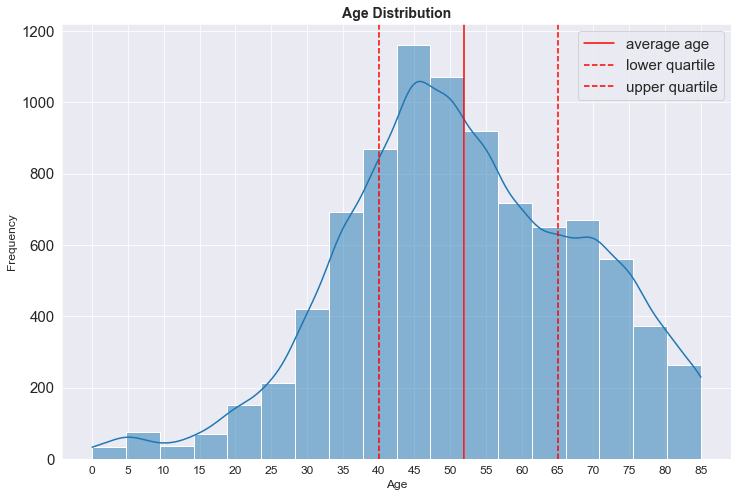

In [33]:
# Plotting the age distribution of all samples in the dataset

fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(df_cleaned['age'], kde=True, bins=18)

plt.title('Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Setting xticks to increase by 5
xticks_range = range(int(df_cleaned['age'].min()), int(df_cleaned['age'].max()) + 1, 5)
plt.xticks(xticks_range, fontsize=12)

# Calculating the average age and ploting the lines in hist chart
plt.axvline(x=np.mean(df_cleaned['age']), color='red', label='average age')
plt.axvline(x=np.percentile(df_cleaned['age'], 25), color='red', linestyle='--', label='lower quartile')
plt.axvline(x=np.percentile(df_cleaned['age'], 75), color='red', linestyle='--', label='upper quartile')
plt.legend()

plt.show()

The majority of the samples are aged around 40 to 60 years of age. <br>
By this we understand that this age group made the most tests to determine the lesion type!

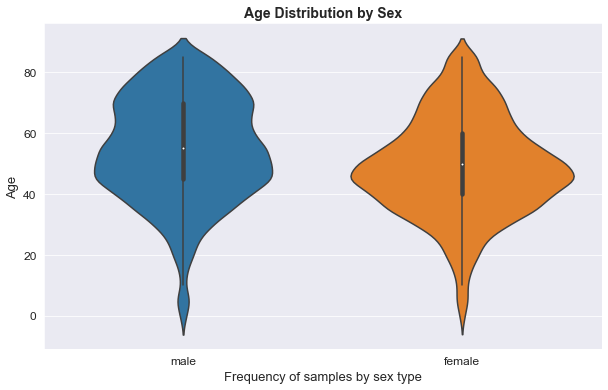

In [34]:
# Plotting the age distribution by sex type of the samples

fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(data=df_cleaned, x='sex', y='age')

plt.title('Age Distribution by Sex', fontsize=14, fontweight='bold')
plt.xlabel('Frequency of samples by sex type', fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel('Age', fontsize=13)
plt.yticks(fontsize=12)

plt.show()

Both males and females have more samples in the ages around 45 to 50. However, Females of other age groups have drastically fewer samples compared with ages around 45 to 50. <br>
For Males the number of samples reaches the highest number in this group (ages around 45 to 50), but after a declanation in number of samples (after this age group) we obserbe that there is an increase again of the reported(collected) samples for 'Males' aged around 70 years of age!

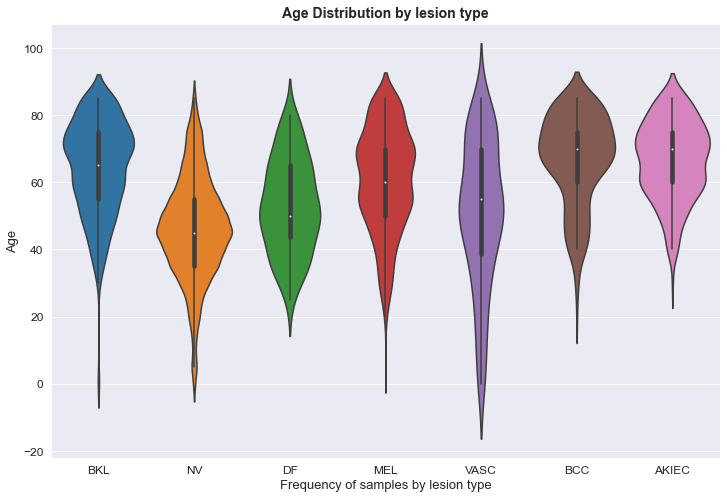

In [35]:
# Plotting the age distribution by lesion type type of the samples

fig, ax = plt.subplots(figsize=(12,8))
sns.violinplot(data=df_cleaned, x='lesion_type_abbr', y='age')

plt.title('Age Distribution by lesion type', fontsize=14, fontweight='bold')
plt.xlabel('Frequency of samples by lesion type', fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel('Age', fontsize=13)
plt.yticks(fontsize=12)

plt.show()

From the chart above, we can observe a relationship of age distribution by each lession type:

- Fristly for cases confirmed with **NV (melanocytic nevi)** which we have the hightst number of the cases (higher than 50%), the most of the cases are aged around 45 years of age. Soo if you are diagnosed with NV (melanocytic nevi) it is very likely that you are aged around 45 years of age. Also the distribution of age for NV is very similar with the distribution of the age for all the dataset. This is because, as it was mentioned before with this tybe of confirmation we have the majority of data, and this affected the overall age distribution.
- For cases confirmed with **BKL (benign keratosis-like lesions)**, the most patients are aged around 70 years of age. Soo if you are diagnosed with BKL (benign keratosis-like lesions) it is very likely that you are aged around 70
- For cases confirmed with **DF (dermatofibroma)**, the most patients are aged around 50 years of age, although the distribution is veru much spead as equal around 30 to 70 year of age. 
- For cases confirmed with **MEL (melanoma)**, the most patients are aged around 70 and 50 years of age. 
- For cases confirmed with **VASC (vascular lesions)**, the age of the patient is not that important, since the distribution is very mutch spread in a wide range of ages. 
- For cases confirmed with **BCC (basal cell carcinoma)**, the most patients are aged around 65 to 80 years of age. 
- For cases confirmed with **AKIEC (actinic keratoses and intraepithelial carcinoma)**, the most patients are aged around 70 to 70 years of age. 

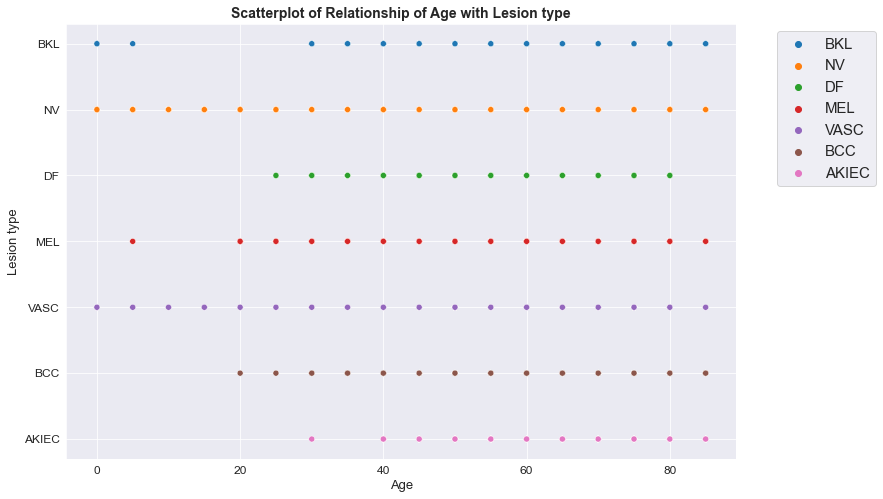

In [36]:
# Plotting the relationship of age and lesion_type by scatterplot

fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(data=df_cleaned, x='age', y='lesion_type_abbr', hue = 'lesion_type_abbr')

plt.title('Scatterplot of Relationship of Age with Lesion type', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel('Lesion type', fontsize=13)
plt.yticks(fontsize=12)

# Getting the current axes
ax = plt.gca()

# Moveing the legend outside of the graph to the right
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

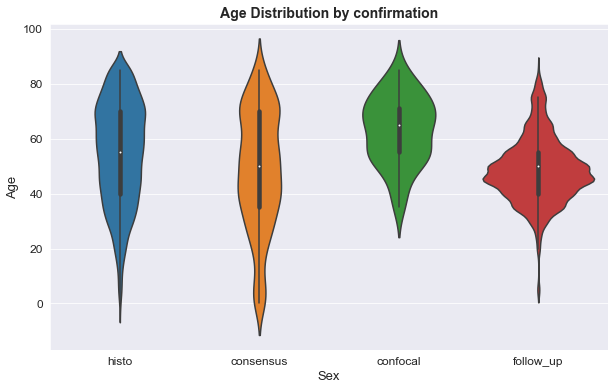

In [37]:
# Plotting the age distribution by confirmation type of the samples

fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(data=df_cleaned, x='confirmation', y='age')

plt.title('Age Distribution by confirmation', fontsize=14, fontweight='bold')
plt.xlabel('Sex', fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel('Age', fontsize=13)
plt.yticks(fontsize=12)

plt.show()

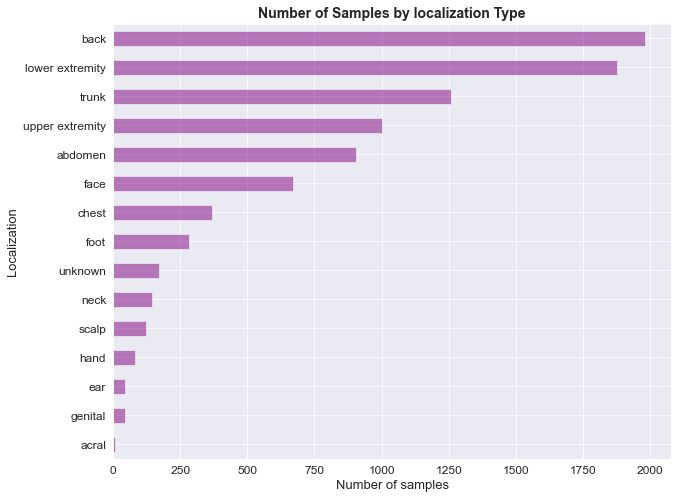

In [38]:
# Calculating the number of samples per each localization area

values_by_localization = df_cleaned['localization'].value_counts().sort_values()

# Plotting the barh chart using matplotlib
ax = values_by_localization.plot(kind='barh', alpha=0.5, color='purple', figsize=(10, 8))

plt.title('Number of Samples by localization Type', fontsize=14, fontweight='bold')

plt.xticks(rotation=0, fontsize=12)
plt.xlabel('Number of samples', fontsize=13)

plt.yticks(fontsize=12)
plt.ylabel('Localization', fontsize=13)

plt.show()

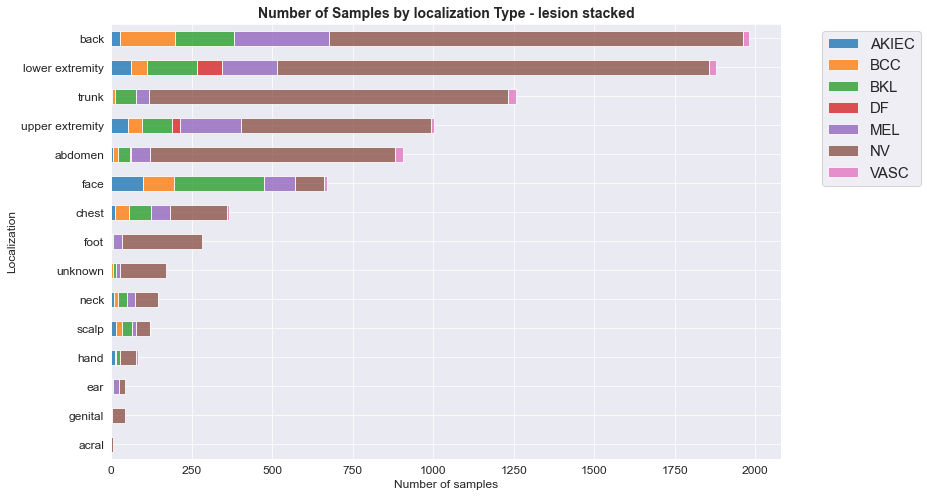

In [39]:
# Creating a list to get sorted indexies as the above chart
localization_order = list(values_by_localization.index)

# Calculating the number of samples per each localization area
values_by_lesion_type_localization= df_cleaned.groupby(['localization', 'lesion_type_abbr']).size().unstack().reindex(localization_order)

# Plotting the bar chart using matplotlib
ax = values_by_lesion_type_localization.plot(kind='barh', stacked=True, figsize=(12, 8), alpha=0.8)

plt.title('Number of Samples by localization Type - lesion stacked', fontsize=14, fontweight='bold')

plt.xticks(rotation=0, fontsize=12)
plt.xlabel('Number of samples', fontsize=12)

plt.yticks(fontsize=12)
plt.ylabel('Localization', fontsize=12)

# Getting the current axes
ax = plt.gca()

# Moveing the legend outside of the graph to the right
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

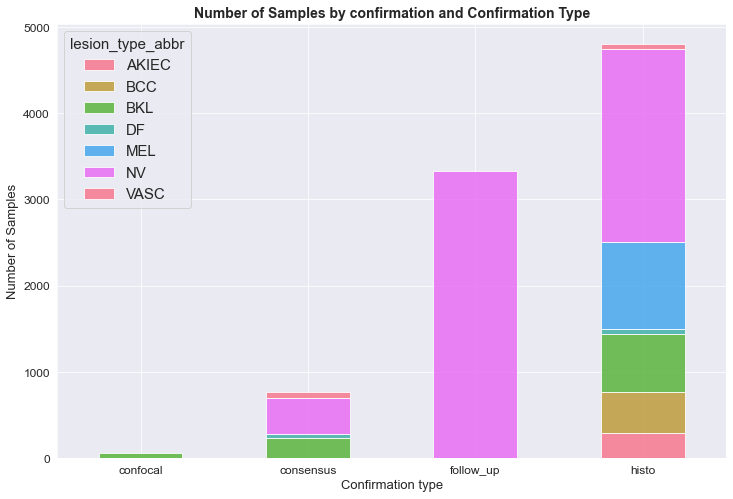

In [40]:
# Calculating the number of samples per each confirmation type

values_by_lesion_type_confirmation = df_cleaned.groupby(['confirmation', 'lesion_type_abbr']).size().unstack()

# Defining custom colors for the bar chart
custom_colors = sns.color_palette("husl")

# Plotting the bar chart using matplotlib
ax = values_by_lesion_type_confirmation.plot(kind='bar', stacked=True, figsize=(12, 8), alpha=0.8, color=custom_colors)

plt.title('Number of Samples by confirmation and Confirmation Type', fontsize=14, fontweight='bold')

plt.xticks(rotation=0, fontsize=12)
plt.xlabel('Confirmation type', fontsize=13)

plt.yticks(fontsize=12)
plt.ylabel('Number of Samples', fontsize=13)

plt.show()

From the chart above, we understand that:

- All patients confirmed from 'follow_up', are diagnosed with NV (melanocytic nevi) (all follow up cases are diagnosed with NV (melanocytic nevi)).
- All patients confirmed from 'confocal', are diagnosed with BKL (benign keratosis-like lesions).
- If patient lesion is confirmed by 'consensus' then probability to be diagnosed as BKL or NV is higher, but there is also a chance to be diagnosed with VASC and MEL
- If the patient lesion is confirmed with 'histo' then we can have any of the lesion types diagnosed. The risk to be diagnosed with MEL is higher when the confirmation is being made with 'histo' (considering the number of samples in the dataset)

In order to see better the lesion type for each confirmation, lets make pie charts of them:

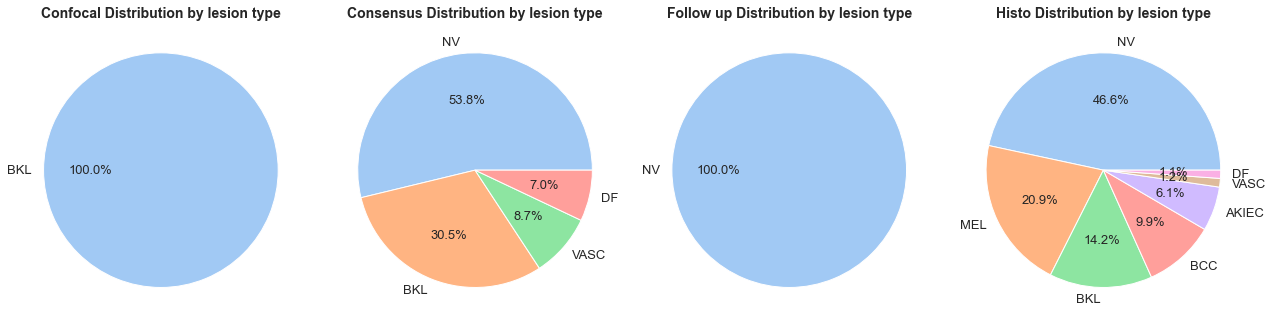

In [41]:
# Defining custom colors for the pie charts
custom_colors = sns.color_palette("pastel")

# Createing a 1x4 grid for subplots
fig, axs = plt.subplots(1, 4, figsize=(18, 6)) 

# Creatingd DataFrames and titles for each pie chart
data_sets = [
    (df_cleaned.loc[df_cleaned['confirmation'] == 'confocal']['lesion_type_abbr'].value_counts(), 'Confocal Distribution by lesion type'),
    (df_cleaned.loc[df_cleaned['confirmation'] == 'consensus']['lesion_type_abbr'].value_counts(), 'Consensus Distribution by lesion type'),
    (df_cleaned.loc[df_cleaned['confirmation'] == 'follow_up']['lesion_type_abbr'].value_counts(), 'Follow up Distribution by lesion type'),
    (df_cleaned.loc[df_cleaned['confirmation'] == 'histo']['lesion_type_abbr'].value_counts(), 'Histo Distribution by lesion type')
]

# Increasing the overall fontsize of the plot
plt.rc('font', size=13)

# Using for loop, to loop through each data set and create pie charts in each subplot
for i, (data, title) in enumerate(data_sets):
    axs[i].pie(data, labels=data.index, colors=custom_colors, autopct='%1.1f%%')
    axs[i].set_title(title, fontsize=14, fontweight='bold')
    axs[i].set_ylabel('')

plt.tight_layout()

plt.show()

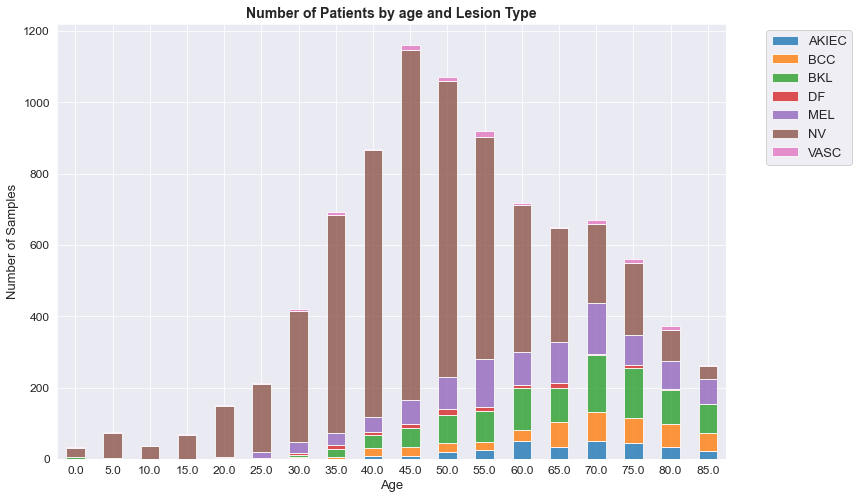

In [42]:
# Calculating the number of samples per each age

values_by_age_lesion_type = df_cleaned.groupby(['age', 'lesion_type_abbr']).size().unstack()

# Plot the bar chart using matplotlib
ax = values_by_age_lesion_type.plot(kind='bar', stacked=True, figsize=(12, 8), alpha=0.8)

plt.title('Number of Patients by age and Lesion Type', fontsize=14, fontweight='bold')

plt.xticks(rotation=0, fontsize=12)
plt.xlabel('Age', fontsize=13)

plt.yticks(fontsize=12)
plt.ylabel('Number of Samples', fontsize=13)

# Get the current axes
ax = plt.gca()

# Move the legend outside of the graph to the right
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Conclusions


Based on the findings from the exploratory data analysis (EDA), we can draw the following conclusions:

* Distribution of Lesion Types: The dataset contains various lesion types, with the most common being melanocytic nevi (NV). Other lesion types include benign keratosis-like lesions (BKL), dermatofibroma (DF), melanoma (MEL), vascular lesions (VASC), basal cell carcinoma (BCC), and actinic keratoses and intraepithelial carcinoma (AKIEC).

* Gender Distribution: The dataset is relatively balanced between males and females, with approximately 54.7% of patients being males and 45.3% females. This balance suggests that both genders are well-represented in the dataset.

* Confirmation Methods: The majority of samples are confirmed by histopathology (53.6%), followed by follow-up examinations (37.1%), consensus (8.06%), and confocal microscopy (0.7%).

* Age Distribution: The age distribution of patients in the dataset shows that the majority of samples fall in the age range of 40 to 60 years old. The age group of 45 to 50 years has the highest number of samples. Additionally, there is an increase in reported samples for males aged around 70 years.

* Age Distribution by Lesion Type: Different lesion types show distinct age distributions. NV (melanocytic nevi) cases are most common around 45 years of age. BKL (benign keratosis-like lesions) cases are more frequent around 70 years of age. DF (dermatofibroma) cases are common around 50 years of age. MEL (melanoma) cases are prominent at both 70 and 50 years of age. VASC (vascular lesions) cases have a more evenly spread age distribution. BCC (basal cell carcinoma) cases are more frequent between 65 to 80 years of age. AKIEC (actinic keratoses and intraepithelial carcinoma) cases are most common around 70 years of age.

* Confirmation vs. Lesion Type: Certain lesion types have higher probabilities of being diagnosed based on the confirmation method. For example, all follow-up cases are diagnosed with NV (melanocytic nevi), while all confocal-confirmed cases are diagnosed with BKL (benign keratosis-like lesions). When the confirmation is made through consensus, there is a higher chance of being diagnosed with BKL or NV, but there is also a possibility of being diagnosed with VASC or MEL. Cases confirmed by histopathology (histo) can have any of the lesion types diagnosed, with a higher risk of being diagnosed with MEL compared to other confirmation methods.

Considering these findings, if we plann to create a classifying model, it would be essential to use the preprocessed image information (that we get from images) as it contains the visual features of the skin lesions, which are crucial for accurate classification. 
The additional features from df, such as age, gender, and confirmation method, might be useful as auxiliary information to improve the performance of the model, but we are not sure so far!

Also, by analyzing the data of the samples that we have we see that our data if very much impalanced by lesion_type. While creating a classifying model, it is better to resample the data in order to balance all label categories!